# Import

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
from tabulate import tabulate

# Data Loading

In [6]:
stocks =['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'CSCO', 'TSLA', 'NVDA', 'JPM', 'GS', 'NFLX']

start_date = pd.Timestamp.now() - pd.DateOffset(months=3)
end_date = pd.Timestamp.now()

prices = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
prices.to_csv('Dataset.csv')

[*********************100%%**********************]  10 of 10 completed


In [ ]:
# Taking risk free asset as PPF with return rate = 7.1% annual
risk_free_rate = (1 + 0.071)**(1/365) - 1
risk_free_rate

0.00018794311516479034

# Description of Assets

In [ ]:
returns = prices.pct_change().dropna()
returns

Ticker,AAPL,AMZN,CSCO,GOOGL,GS,JPM,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,,,
2023-11-24,-0.007004,0.000204,0.005824,-0.012997,0.001506,0.001370,-0.001112,0.003264,-0.019296,0.005294
2023-11-27,-0.000948,0.006747,-0.008892,-0.002048,-0.004246,-0.002279,0.003126,-0.000813,0.009754,0.002676
2023-11-28,0.003214,-0.004738,-0.001669,0.005791,-0.000178,0.002285,0.010803,-0.000355,-0.008727,0.045069
2023-11-29,-0.005410,-0.004829,0.004180,-0.016108,0.016005,0.005080,-0.010060,-0.003779,0.006671,-0.010457
2023-11-30,0.003063,-0.001572,0.006868,-0.018224,0.003762,0.011405,0.000158,-0.006748,-0.028459,-0.016630
2023-12-01,0.006791,0.006434,0.001860,-0.005055,0.020173,0.004869,-0.011612,-0.017364,-0.000107,-0.005207
2023-12-04,-0.009465,-0.014895,-0.008665,-0.019642,0.002755,0.007332,-0.014339,-0.025422,-0.026836,-0.013608
2023-12-05,0.021063,0.014085,-0.002497,0.013305,-0.021867,-0.000127,0.009156,0.002754,0.023294,0.013329
2023-12-06,-0.005687,-0.016068,-0.004799,-0.007405,0.000644,-0.010508,-0.009986,-0.018499,-0.022828,0.002723


In [ ]:
returns_transposed = returns.transpose()
dates = returns.index.date
heatmap_trace = go.Heatmap(z=returns_transposed.values,
                            x=dates,
                            y=returns_transposed.index,
                            colorscale='BrBg',
                            colorbar=dict(title='Returns'),
                            )

# Create layout
layout = go.Layout(title='Returns of Selected Companies',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Company'),
                   width=1000,  # Set the width of the figure
                   height=400   # Set the height of the figure
                   )

# Create figure
fig = go.Figure(data=[heatmap_trace], layout=layout)

# Show plot
fig.show()

In [ ]:
cov_matrix = returns.cov()

fig = px.imshow(cov_matrix, labels=dict(color="Covariance"), x=cov_matrix.index, y=cov_matrix.columns, color_continuous_scale='BrBg')
fig.update_layout(title='Covariance Matrix Heat Map', xaxis_title='Assets', yaxis_title='Assets')
fig.show()

# CAPM Expected return Calculation

In [ ]:
market = returns.mean(axis = 1 )
cov_matrix = returns.cov()
market_return = market.mean()
market_var = market.var()
betas = []
for i in returns.columns:
    b = market.cov(returns[i])/market_var
    betas.append(b)
betas = np.array(betas)
print("Market Return:", market_return)
print("Market Variance:", market_var)

Market Return: 0.0015385407086727777
Market Variance: 7.602862085389597e-05


In [ ]:
betas = pd.Series(betas , index = returns.columns)
table_data = list(zip(betas.index, betas))
table_headers = ["Asset", "Beta"]

print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

╒═════════╤══════════╕
│ Asset   │     Beta │
╞═════════╪══════════╡
│ AAPL    │ 0.766933 │
├─────────┼──────────┤
│ AMZN    │ 1.37686  │
├─────────┼──────────┤
│ CSCO    │ 0.474732 │
├─────────┼──────────┤
│ GOOGL   │ 1.26973  │
├─────────┼──────────┤
│ GS      │ 0.45492  │
├─────────┼──────────┤
│ JPM     │ 0.319089 │
├─────────┼──────────┤
│ MSFT    │ 0.900847 │
├─────────┼──────────┤
│ NFLX    │ 1.17004  │
├─────────┼──────────┤
│ NVDA    │ 1.81518  │
├─────────┼──────────┤
│ TSLA    │ 1.45166  │
╘═════════╧══════════╛


In [ ]:
expected_returns_CAPM = risk_free_rate + betas * (market_return - risk_free_rate)
expected_returns_CAPM = pd.Series(expected_returns_CAPM, index=returns.columns)

table_data = list(zip(expected_returns_CAPM.index, expected_returns_CAPM))
table_headers = ["Asset", "Expected Return (CAPM)"]

print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

╒═════════╤══════════════════════════╕
│ Asset   │   Expected Return (CAPM) │
╞═════════╪══════════════════════════╡
│ AAPL    │              0.00122376  │
├─────────┼──────────────────────────┤
│ AMZN    │              0.00204753  │
├─────────┼──────────────────────────┤
│ CSCO    │              0.000829116 │
├─────────┼──────────────────────────┤
│ GOOGL   │              0.00190284  │
├─────────┼──────────────────────────┤
│ GS      │              0.000802356 │
├─────────┼──────────────────────────┤
│ JPM     │              0.000618904 │
├─────────┼──────────────────────────┤
│ MSFT    │              0.00140462  │
├─────────┼──────────────────────────┤
│ NFLX    │              0.0017682   │
├─────────┼──────────────────────────┤
│ NVDA    │              0.00263952  │
├─────────┼──────────────────────────┤
│ TSLA    │              0.00214855  │
╘═════════╧══════════════════════════╛


In [ ]:
min_return = returns.mean().min()
max_return = returns.mean().max()

In [ ]:
mean_returns = returns.mean()
table_data = list(zip(mean_returns.index, mean_returns))
table_headers = ["Asset", "Simple Return (Daily)"]

print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

╒═════════╤═════════════════════════╕
│ Asset   │   Simple Return (Daily) │
╞═════════╪═════════════════════════╡
│ AAPL    │            -0.0007216   │
├─────────┼─────────────────────────┤
│ AMZN    │             0.0024452   │
├─────────┼─────────────────────────┤
│ CSCO    │             0.000311347 │
├─────────┼─────────────────────────┤
│ GOOGL   │             0.000619907 │
├─────────┼─────────────────────────┤
│ GS      │             0.00250572  │
├─────────┼─────────────────────────┤
│ JPM     │             0.00289069  │
├─────────┼─────────────────────────┤
│ MSFT    │             0.001126    │
├─────────┼─────────────────────────┤
│ NFLX    │             0.00323884  │
├─────────┼─────────────────────────┤
│ NVDA    │             0.00567547  │
├─────────┼─────────────────────────┤
│ TSLA    │            -0.00270616  │
╘═════════╧═════════════════════════╛


# Optimizer class

In [245]:

class PortfolioOptimizer:
    def __init__(self , prices ):
        self.prices = prices
        self.returns = prices.pct_change().dropna()
        self.risks = prices.pct_change().dropna().std()
        self.optimal_return = None

    def markowitz_optimization(self):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()
        optimal_return = None

        # Define optimization function
        def portfolio_return(weights):
            return -np.dot(weights, returns_mean)

        def portfolio_variance(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
        bounds = None

        # Initial guess (equal weighting)
        initial_guess = np.array(num_assets * [1. / num_assets,])

        # Perform optimization
        optimal_weights = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        optimal_risk = portfolio_variance(optimal_weights.x)
        optimal_return = -portfolio_return(optimal_weights.x)
        self.optimal_return = optimal_return
        return optimal_weights.x, optimal_risk, optimal_return

    def markowitz_optimization_for_target_return(self, target_return):
        returns = self.returns
        num_assets = len(returns.columns)
        returns_mean = returns.mean()
        cov_matrix = returns.cov()

        # Define optimization function
        def portfolio_variance(weights):
            return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Define constraints and bounds for optimization
        constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                       {'type': 'eq', 'fun': lambda x: np.dot(x, returns_mean) - target_return})
        bounds = None

        # Initial guess (equal weighting)
        initial_guess = np.array(num_assets * [1. / num_assets,])

        # Perform optimization
        optimal_weights = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
        optimal_risk = portfolio_variance(optimal_weights.x)
        return optimal_weights.x, optimal_risk, target_return


    def plot_efficient_frontier_with_cml(self):
        returns = self.returns
        # min_return = returns.mean().min()
        min_return = self.optimal_return
        max_return = 0.02
        # max_return = 0.15
        # creating a list of target returns for plotting efficient frontier
        targets = np.linspace(min_return, max_return, 100)
        weights = []
        risks = []
        return_ = []
        cov_matrix = returns.cov()

        for i in range(len(targets)):
            # for each return finding risk and weights associated with it using the optimization problem
            w, ri, re = self.markowitz_optimization_for_target_return(targets[i])
            weights.append(w)
            risks.append(ri) # store the obtained risks in a list to plot the efficient frontier
            return_.append(re) # creating a list of returns

        hover_text1 = []
        for i in range(len(risks)):
            # print(risks[i] , return_[i] , self.sharpe_ratio(return_[i] , risks[i]))
            sharpe_ratio_tmp = self.sharpe_ratio(return_[i] , risks[i])

            hover_text1.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f} <br> Sharpe Ratio : { sharpe_ratio_tmp }')

        returns_mean = returns.mean()
        ret = (returns_mean - risk_free_rate)
        cov_inv = np.linalg.inv(cov_matrix)
        slope = np.sqrt(np.dot(ret.T , np.dot(cov_inv , ret)))

        y = np.linspace( risk_free_rate , 0.02 , 100  )
        x = ( y - risk_free_rate)/slope
        w_star, mu_star, sigma_star = self.get_w_star()
        w_risky = x/sigma_star
        weights_cml = []
        for i in w_risky:
            w_temp = w_star*i
            weights_cml.append(w_temp)

        # print("Slope: ", slope)
        hover_text = []
        for i in range(len(y)):
            r = y[i]
            ri = y[i] - risk_free_rate
            ri = ri/slope
            hover_text.append(
                f'Risks: {ri:.4f}<br>Weights: {weights_cml[i]}<br>Return: {r:.4f} <br> w_risky : {self.get_w_risky(r)} <br>Sharpe Ratio : {self.sharpe_ratio(r , ri)}')

        efficient_frontier_trace = go.Scatter(x=risks, y=return_, mode='lines', name='Efficient Frontier' , text=hover_text1,
            hoverinfo='text')
        tangent_line_trace = go.Scatter(x=x, y=y, mode='lines', name='Tangent Line', line=dict(color='red') ,  text=hover_text,
            hoverinfo='text')

        w_star, mu_star, sigma_star = self.get_w_star()
        slope_new = (mu_star - risk_free_rate)/sigma_star
        # print(slope_new, slope)
        tangent_point_trace = go.Scatter(x=[sigma_star], y=[mu_star], mode='markers', name='Tangent Point', marker=dict(symbol = 'star' , color='green', size=14))

        fig = go.Figure(data=[efficient_frontier_trace, tangent_line_trace , tangent_point_trace ])
        fig.update_layout(title='Capital Market Line and Efficient Frontier', xaxis_title='Risk', yaxis_title='Return' , width = 1000 , height = 600  )
        fig.show()
        return sigma_star , mu_star

    def get_w_star(self):
        returns = self.returns
        cov_matrix = returns.cov()
        returns_mean = returns.mean()
        cov_inv = np.linalg.inv(cov_matrix)
        ret = (returns_mean - risk_free_rate)
        denr = np.sum( np.dot( cov_inv , ret ))
        w_star = np.dot( cov_inv , ret )/denr

        mu_der_star = np.dot(w_star , returns_mean)

        sigma_der_star = np.dot(w_star.T , np.dot(cov_matrix , w_star ))
        return w_star , mu_der_star , np.sqrt(sigma_der_star )

    def get_w_risky(self , target_return) :
        mu_der_star = self.get_w_star()[1]
        w_risky = (target_return - risk_free_rate )/( mu_der_star - risk_free_rate )
        return w_risky

    def plot_security_market_line(self):
        returns = self.returns
        returns_mean = returns.mean()

        fig = go.Figure()
        slope_ = (expected_returns_CAPM[1] - expected_returns_CAPM[0])/(betas[1] - betas[0])
        bet = np.linspace(0,2, 100)
        ercapm = slope_*bet + risk_free_rate

        # Plot the Security Market Line
        fig.add_trace(go.Scatter(x=bet, y=ercapm, mode='lines', name='Security Market Line', line=dict(color='blue')))

        fig.add_shape(type='line',
              x0=1, x1=1,
              y0=0, y1=market_return,
              line=dict(color='black', width=2, dash='dash'))

        fig.add_shape(type='line',
                      y0=market_return, y1=market_return,
                      x0=0, x1=1,
                      line=dict(color='black', width=2, dash='dash'))

        fig.add_trace(go.Scatter(x=[1], y=[market_return], mode='markers', name='Market Return',
                         marker=dict(symbol='circle', color='red', size=10)))

        # Scatter plot for individual securities
        for security in ['NVDA', 'AAPL', 'TSLA']:
            fig.add_trace(go.Scatter(x=[betas[security]], y=[returns_mean[security]], mode='markers', name=security, marker=dict(symbol = 'star' , color=['red', 'black', 'green'][['NVDA', 'AAPL', 'TSLA'].index(security)] , size = 14 ) ))

        fig.update_layout(title='Security Market Line',
                          xaxis_title='Beta',
                          yaxis_title='Expected Returns',
                          legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                          showlegend=True , width = 800 , height = 600 )

        fig.add_annotation(x=1, y=market_return+0.0001,
                   text='[1, E[Rm]]',
                   showarrow=True,
                   arrowcolor='black',
                   arrowwidth=2,
                   arrowhead=4,
                   ax=0,
                   ay=-30)

        fig.show()


    def sharpe_ratio(self , mu_der , sigma_der ):
        return (mu_der - risk_free_rate )/sigma_der

    def treynor_ratio(self , r_p , beta_p ) :
        return (r_p - risk_free_rate)/beta_p

    def get_w_of_frontier(self, target_return):
        return self.markowitz_optimization_for_target_return(target_return)

    def get_w_of_cml(self, target_return):
        returns_mean = returns.mean()
        ret = (returns_mean - risk_free_rate)
        cov_inv = np.linalg.inv(cov_matrix)
        slope = np.sqrt(np.dot(ret.T , np.dot(cov_inv , ret)))
        y = target_return
        x = ( y - risk_free_rate)/slope
        w_star, mu_star, sigma_star = self.get_w_star()
        w_risky = x/sigma_star
        weights_cml = w_star*w_risky
        return weights_cml, x, target_return


    def get_risk(self , target_return ) :
        returns = self.returns
        returns_mean = returns.mean()
        ret = (returns_mean - risk_free_rate)
        cov_inv = np.linalg.inv(cov_matrix)
        slope = np.sqrt(np.dot(ret.T , np.dot(cov_inv , ret)))
        x = ( target_return - risk_free_rate)/slope
        return x


    def plot_efficient_frontier_with_cml_target_retrn(self, target_return):
        returns = self.returns
        min_return = self.optimal_return
        max_return = 0.02
        targets = np.linspace(min_return, max_return, 100)
        weights = []
        risks = []
        return_ = []
        cov_matrix = returns.cov()

        for i in range(len(targets)):
            w, ri, re = self.markowitz_optimization_for_target_return(targets[i])
            weights.append(w)
            risks.append(ri)
            return_.append(re)

        hover_text1 = []
        for i in range(len(risks)):
            hover_text1.append(
                f'Risks: {risks[i]:.4f}<br>Weights: {weights[i]}<br>Return: {return_[i]:.4f} <br> Sharpe Ratio : {self.sharpe_ratio(return_[i] , risks[i] )}')

        returns_mean = returns.mean()
        ret = (returns_mean - risk_free_rate)
        cov_inv = np.linalg.inv(cov_matrix)
        slope = np.sqrt(np.dot(ret.T , np.dot(cov_inv , ret)))

        y = np.linspace( risk_free_rate , 0.02 , 100  )
        x = ( y - risk_free_rate)/slope

        hover_text = []
        for i in range(len(y)):
            r = y[i]
            ri = y[i] - risk_free_rate
            ri = ri/slope
            # print( r , ri )
            # print(self.sharpe_ratio(r , ri ))
            hover_text.append(
                f'Risks: {ri:.4f}<br>Weights: {weights[i]}<br>Return: {r:.4f} <br> w_risky : {self.get_w_risky(r)} <br>Sharpe Ratio : {self.sharpe_ratio(r , ri)}')

        efficient_frontier_trace = go.Scatter(x=risks, y=return_, mode='lines', name='Efficient Frontier', text=hover_text1, hoverinfo='text')
        tangent_line_trace = go.Scatter(x=x, y=y, mode='lines', name='Capital Market Line', line=dict(color='red'), text=hover_text, hoverinfo='text')

        w_star, mu_star, sigma_star = self.get_w_star()
        slope_new = (mu_star - risk_free_rate)/sigma_star
        tangent_point_trace = go.Scatter(x=[sigma_star], y=[mu_star], mode='markers', name='Tangent Point', marker=dict(symbol='star', color='green', size=14))

        # Adding dotted line for target return
        target_line_trace = go.Scatter(x=[0, max(risks)], y=[target_return, target_return], mode='lines', name=f'Target Return: {target_return}', line=dict(color='black', dash='dot'))

        # CML Point
        w1, risk1, ret1 = self.get_w_of_cml(target_return)

        # Frontier Point
        w2, risk2, ret2 = self.get_w_of_frontier(target_return)

        intersection_trace_ef = go.Scatter(x=[risk2], y=[target_return], mode='markers', name='Intersection with Efficient Frontier', marker=dict(symbol='circle', color='magenta', size=8))
        intersection_trace_cl = go.Scatter(x=[risk1], y=[target_return], mode='markers', name='Intersection with Capital Market Line', marker=dict(symbol='circle', color='blue', size=8))

        # Add the new traces to the existing ones
        fig = go.Figure(data=[efficient_frontier_trace, tangent_line_trace, tangent_point_trace, target_line_trace, intersection_trace_ef, intersection_trace_cl])
        fig.update_xaxes(range=[ 0 , 0.02 ])
        fig.update_yaxes(range=[ 0 , 0.015])
        # Show the plot
        fig.show()


In [246]:
portfolio_optimizer1 = PortfolioOptimizer(prices)

In [247]:
weights , sigma , mu = portfolio_optimizer1.markowitz_optimization()

In [248]:
w_star , mu_der , sigma_der = portfolio_optimizer1.get_w_star()
print(w_star , mu_der , sigma_der )

[-0.54346977  0.03397866 -0.40576629 -0.03573922  0.08965526  1.47417406
  0.19114599  0.06185103  0.41798428 -0.28381399] 0.008368650483084735 0.015089391394989791


# Weigth for risk (w_risky)

In [249]:
w_risky = portfolio_optimizer1.get_risk( target_return = 0.01 )
print("Weights for Risky Assets : " ,w_risky )

Weights for Risky Assets :  0.0180984308650107


# Plotting Capital Market Line with Efficient Frontier

In [250]:
sigma_star , mu_star = portfolio_optimizer1.plot_efficient_frontier_with_cml()

# Tangency Point

In [ ]:
print(f"Tangency Point\nRisk : {sigma_star} , Return : {mu_star } " )

Tangency Point
Risk : 0.015089391394989791 , Return : 0.008368650483084735 


In [ ]:
target_return = 0.02
w_risky = portfolio_optimizer1.get_w_risky(target_return)
w_risky

2.4218024180313265

# Security Market Line

In [244]:
portfolio_optimizer1.plot_security_market_line()

# Performance measures

## Sharpe Ratio

In [ ]:
some_return = 0.004
sharpe_ratios = []
portfolios = ['Tangent-Point Portfolio', 'Portfolio-1']

# Tangent-point Portfolio
tangent_weights, tangent_return, tangent_risk,  = portfolio_optimizer1.get_w_star()
sharpe_ratios.append(portfolio_optimizer1.sharpe_ratio(tangent_return, tangent_risk))

# Portfolio-1
portfolio1_weights, portfolio1_risk, portfolio1_return = portfolio_optimizer1.get_w_of_frontier(some_return)
sharpe_ratios.append(portfolio_optimizer1.sharpe_ratio(portfolio1_return, portfolio1_risk))

assets = returns.columns
return_m = returns.mean()
cov_m = returns.cov()

for i in assets:
  portfolios.append(i)
  # print(return_m[i])
  sharpe_ratios.append(portfolio_optimizer1.sharpe_ratio(return_m[i], np.sqrt(cov_m[i][i])))

table_data = list(zip(portfolios, sharpe_ratios))
table_headers = ["Portfolio", "Sharpe Ratio"]

# Print the tabulated data
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

╒═════════════════════════╤════════════════╕
│ Portfolio               │   Sharpe Ratio │
╞═════════════════════════╪════════════════╡
│ Tangent-Point Portfolio │      0.54215   │
├─────────────────────────┼────────────────┤
│ Portfolio-1             │      0.490909  │
├─────────────────────────┼────────────────┤
│ AAPL                    │     -0.0829822 │
├─────────────────────────┼────────────────┤
│ AMZN                    │      0.139821  │
├─────────────────────────┼────────────────┤
│ CSCO                    │      0.0130904 │
├─────────────────────────┼────────────────┤
│ GOOGL                   │      0.0259194 │
├─────────────────────────┼────────────────┤
│ GS                      │      0.173344  │
├─────────────────────────┼────────────────┤
│ JPM                     │      0.355603  │
├─────────────────────────┼────────────────┤
│ MSFT                    │      0.0890999 │
├─────────────────────────┼────────────────┤
│ NFLX                    │      0.147902  │
├─────────

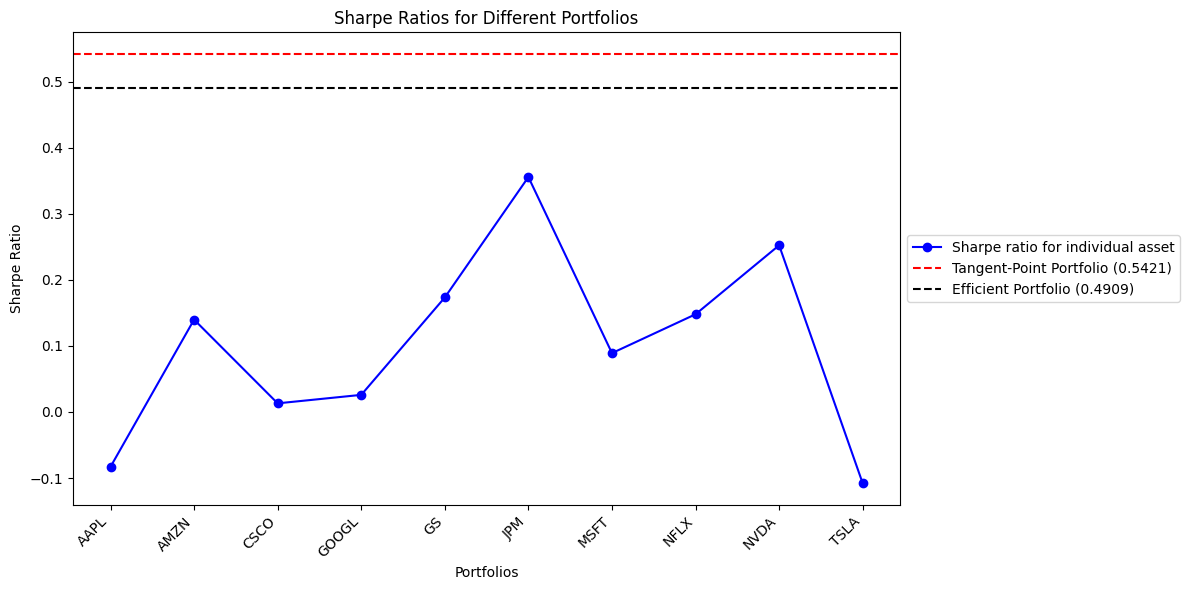

In [ ]:
fig, axes = plt.subplots(figsize = (12,6))
plt.plot(portfolios[2:], sharpe_ratios[2:], marker='o', linestyle='-', color='blue', label = 'Sharpe ratio for individual asset')
plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios for Different Portfolios')
plt.xticks(rotation=45, ha='right')

threshold_value1 = sharpe_ratios[0]
plt.axhline(y=threshold_value1, color='red', linestyle='--', label=f'Tangent-Point Portfolio ({threshold_value1:.4f})')

threshold_value2 = sharpe_ratios[1]
plt.axhline(y=threshold_value2, color='black', linestyle='--', label=f'Efficient Portfolio ({threshold_value2:.4f})')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Treynor Ratio

In [ ]:
some_return = 0.004
treynor_ratios = []
portfolios = ['Tangent-Point Portfolio', 'Portfolio-1']

# Tangent-point Portfolio
tangent_weights, tangent_return, tangent_risk,  = portfolio_optimizer1.get_w_star()
beta_p = np.dot(tangent_weights, betas)
treynor_ratios.append(portfolio_optimizer1.treynor_ratio(tangent_return, beta_p))

# Portfolio-1
portfolio1_weights, portfolio1_risk, portfolio1_return = portfolio_optimizer1.get_w_of_frontier(some_return)
beta_p = np.dot(portfolio1_weights, betas)
treynor_ratios.append(portfolio_optimizer1.treynor_ratio(portfolio1_return, beta_p))

assets = returns.columns
return_m = returns.mean()
cov_m = returns.cov()
idx = 0

for i in assets:
  portfolios.append(i)
  temp = np.zeros(len(assets), dtype = float)
  temp[idx] = 1.
  beta_p = np.dot(temp, betas)
  treynor_ratios.append(portfolio_optimizer1.treynor_ratio(return_m[i], beta_p))

table_data = list(zip(portfolios, treynor_ratios))
table_headers = ["Portfolio", "Treynor Ratio"]

# Print the tabulated data
print(tabulate(table_data, headers=table_headers, tablefmt="fancy_grid"))

╒═════════════════════════╤═════════════════╕
│ Portfolio               │   Treynor Ratio │
╞═════════════════════════╪═════════════════╡
│ Tangent-Point Portfolio │     0.0165459   │
├─────────────────────────┼─────────────────┤
│ Portfolio-1             │     0.00857362  │
├─────────────────────────┼─────────────────┤
│ AAPL                    │    -0.00118595  │
├─────────────────────────┼─────────────────┤
│ AMZN                    │     0.00294323  │
├─────────────────────────┼─────────────────┤
│ CSCO                    │     0.000160906 │
├─────────────────────────┼─────────────────┤
│ GOOGL                   │     0.000563235 │
├─────────────────────────┼─────────────────┤
│ GS                      │     0.00302214  │
├─────────────────────────┼─────────────────┤
│ JPM                     │     0.0035241   │
├─────────────────────────┼─────────────────┤
│ MSFT                    │     0.00122312  │
├─────────────────────────┼─────────────────┤
│ NFLX                    │     0.

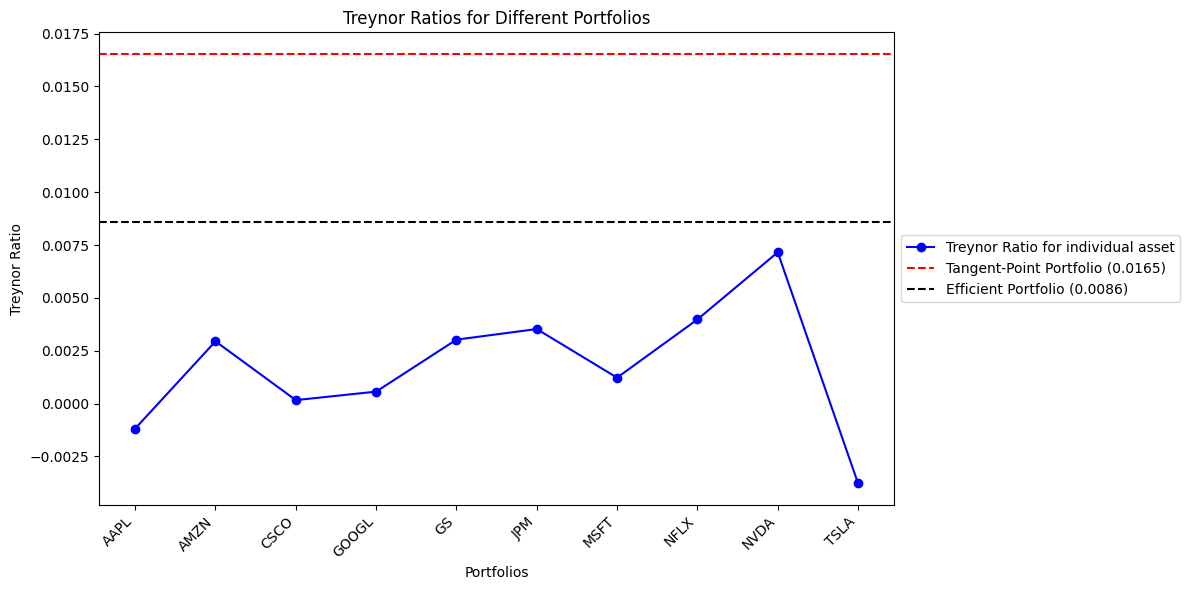

In [ ]:
fig, axes = plt.subplots(figsize = (12,6))
plt.plot(portfolios[2:], treynor_ratios[2:], marker='o', linestyle='-', color='blue', label = 'Treynor Ratio for individual asset')
plt.xlabel('Portfolios')
plt.ylabel('Treynor Ratio')
plt.title('Treynor Ratios for Different Portfolios')
plt.xticks(rotation=45, ha='right')

threshold_value1 = treynor_ratios[0]
plt.axhline(y=threshold_value1, color='red', linestyle='--', label=f'Tangent-Point Portfolio ({threshold_value1:.4f})')

threshold_value2 = treynor_ratios[1]
plt.axhline(y=threshold_value2, color='black', linestyle='--', label=f'Efficient Portfolio ({threshold_value2:.4f})')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Comparison (BONUS)

In [ ]:
portfolio_optimizer1.plot_efficient_frontier_with_cml_target_retrn(target_return = 0.004 )